# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras

2025-07-27 22:10:29.804772: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-07-27 22:10:29.804798: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(adultDataSet_filename)
df.head

<bound method NDFrame.head of         age         workclass  fnlwgt   education  education-num  \
0      39.0         State-gov   77516   Bachelors             13   
1      50.0  Self-emp-not-inc   83311   Bachelors             13   
2      38.0           Private  215646     HS-grad              9   
3      53.0           Private  234721        11th              7   
4      28.0           Private  338409   Bachelors             13   
...     ...               ...     ...         ...            ...   
32556  27.0           Private  257302  Assoc-acdm             12   
32557  40.0           Private  154374     HS-grad              9   
32558  58.0           Private  151910     HS-grad              9   
32559  22.0           Private  201490     HS-grad              9   
32560  52.0      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race  \
0           Never-married       Adm-clerical  Not-in-family  White   
1      Marrie

I will be using a dataset from the CIFAR10 small images classification dataset:
https://keras.io/api/datasets/cifar10/

In [3]:
cifar10 = keras.datasets.cifar10

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. CIFAR-10 Dataset: https://www.cs.toronto.edu/~kriz/cifar.html
2. The model should predict the images into 10 distinct classifications. These include: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.
3. This is a supervised, multi-class classification problem since we are training on labeled data.
4. Our features are the pixel values (intensities) of the images, each feature shape being (32, 32, 3).
5. This is an important problem because image classification can be used in various use cases such as aiding in medical diagnoses using x-ray images, recognizing figures and signs during autonomous driving, reviewing surveillance footage for security, and even in robotics allowing robots to interact with their environment.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

### Visualize the Data

First 25 images using matplotlib:

In [7]:
def show_cifar10_images(images, labels, class_names, num_images):
    num_images = min(num_images, len(images))
    grid_size = int(num_images**0.5)
    if grid_size**2 < num_images:
        grid_size += 1

    plt.figure(figsize=(grid_size * 2, grid_size * 2))
    for i in range(num_images):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        label = int(labels[i])
        plt.xlabel(class_names[label])
    plt.tight_layout()
    plt.show()

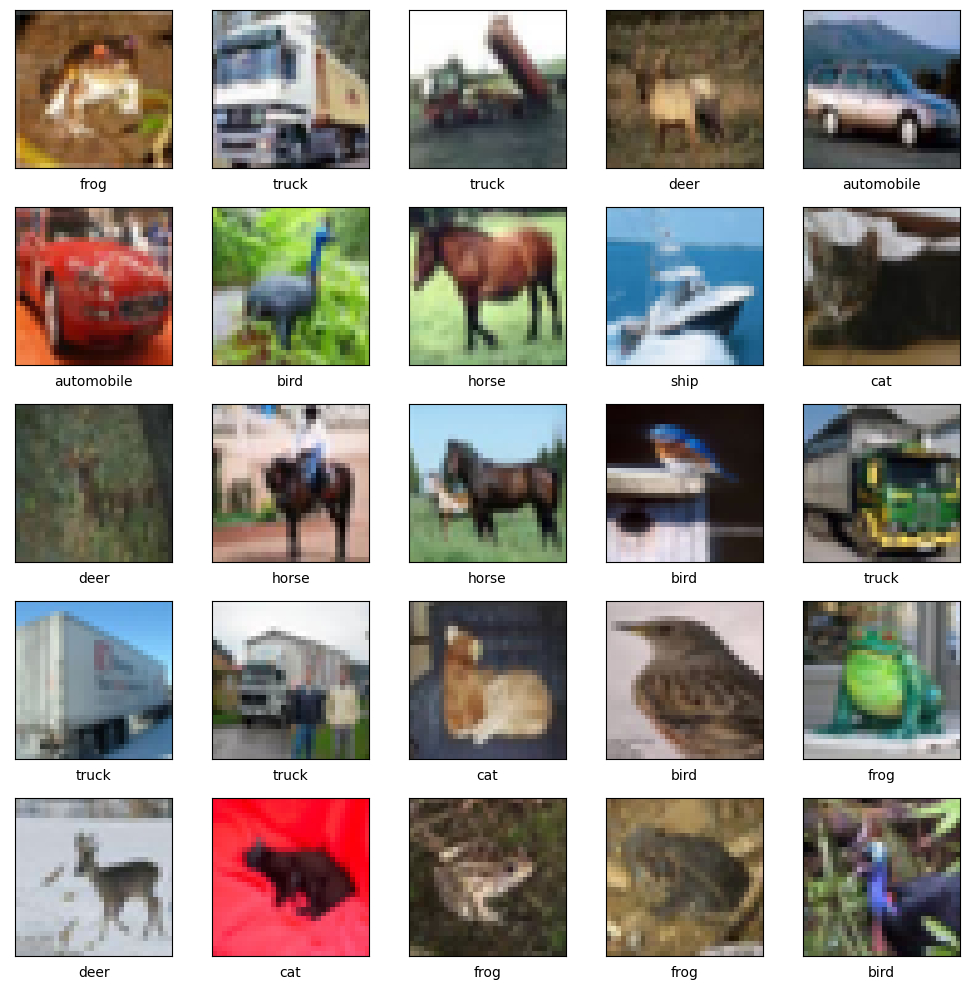

In [8]:
show_cifar10_images(X_train, y_train, class_names, 25)

### Inspect Data

**Inspecting the class distribution:**

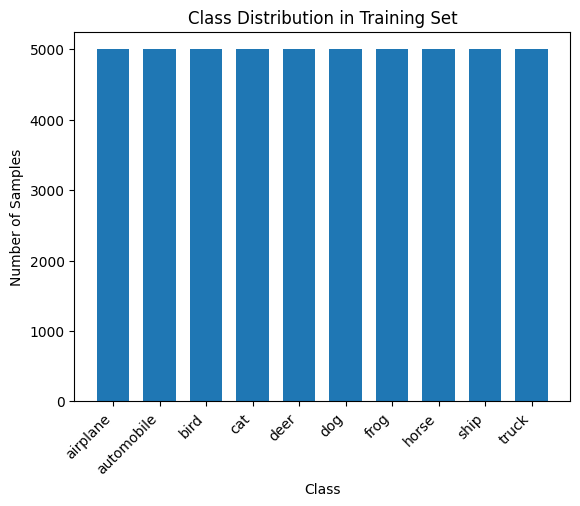

In [9]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, width=0.7)
plt.xticks(unique, class_names)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Set")
plt.show()

As expected, our dataset is balanced with 5000 images per class. There is no need for further modification.

**Inspecting pixel value range:**

In [10]:
print("Min pixel value:", X_train.min())
print("Max pixel value:", X_train.max())

Min pixel value: 0
Max pixel value: 255


For our neural network, we should normalize our data to be between 0 and 1.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

- I do not need a new feature list, using the pixel values should be enough for our deep learning model training.
- I should normalize our data for our CNN and scale it down to values between 0 and 1.
- I will be using a convolutional neural network.
- I will build a CNN with 4 convolutional layers each with batch normalization and a ReLU activation function. For our last output layer, I will use a dense layer with a softmax activation function because this is a multi-classification problem. When compiling our model, I will use a sparse cross entropy loss function because we are provided with integer labels and a stochastic gradient descent optimizer using accuracy as the evaluation metric. Then, we will fit the model to our testing data and evaluate our model's performance. To choose a model that generalizes well to new data, I plan to use grid search for hyperparameter optimization. Adding pooling layers and dropout layers can improve accuracy and reduce overfitting.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [35]:
import time

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### Define Model Structure

In [18]:
# 1. Create CNN model object
cnn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
input_layer = keras.layers.InputLayer(input_shape=X_train[0].shape)
cnn_model.add(input_layer)

# 3. Create the first convolutional layer and add it to the model object:
conv_1 = keras.layers.Conv2D(filters=16, kernel_size=3)
batchNorm_1 = keras.layers.BatchNormalization()
ReLU_1 = keras.layers.ReLU()
cnn_model.add(conv_1)
cnn_model.add(batchNorm_1)
cnn_model.add(ReLU_1)

# 4. Create the second convolutional layer and add it to the model object:
conv_2 = keras.layers.Conv2D(filters=32, kernel_size=3)
batchNorm_2 = keras.layers.BatchNormalization()
ReLU_2 = keras.layers.ReLU()
cnn_model.add(conv_2)
cnn_model.add(batchNorm_2)
cnn_model.add(ReLU_2)

# 5. Create the third convolutional layer and add it to the model object:
conv_3 = keras.layers.Conv2D(filters=64, kernel_size=3)
batchNorm_3 = keras.layers.BatchNormalization()
ReLU_3 = keras.layers.ReLU()
cnn_model.add(conv_3)
cnn_model.add(batchNorm_3)
cnn_model.add(ReLU_3)

# 6. Create the fourth convolutional layer and add it to the model object:
conv_4 = keras.layers.Conv2D(filters=128, kernel_size=3)
batchNorm_4 = keras.layers.BatchNormalization()
ReLU_4 = keras.layers.ReLU()
cnn_model.add(conv_4)
cnn_model.add(batchNorm_4)
cnn_model.add(ReLU_4)

# 7. Create the pooling layer and add it to the model object:
pooling_layer = keras.layers.GlobalAveragePooling2D()
cnn_model.add(pooling_layer)

# 8. Create the output layer and add it to the model object:
output_layer = keras.layers.Dense(units=10, activation='softmax')
cnn_model.add(output_layer)

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_4 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
re_lu_4 (ReLU)               (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu_5 (ReLU)               (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 64)       

### Compile Model

In [19]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

In [20]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [21]:
cnn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

### Fit model to the Training Data

In [22]:
num_epochs = 15

t0 = time.time() 

history = cnn_model.fit(X_train, y_train, epochs=num_epochs)

t1 = time.time() 

print('Elapsed time: %.2fs' % (t1-t0))

2025-07-27 21:02:55.688862: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2025-07-27 21:02:55.692810: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2650000000 Hz
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


Epoch 1/15
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4791 - accuracy: 0.4610
Epoch 2/15
1563/1563 [==============================] - 79s 50ms/step - loss: 1.1853 - accuracy: 0.5794
Epoch 3/15
1563/1563 [==============================] - 79s 50ms/step - loss: 1.0654 - accuracy: 0.6232
Epoch 4/15
1563/1563 [==============================] - 79s 50ms/step - loss: 0.9941 - accuracy: 0.6507
Epoch 5/15
1563/1563 [==============================] - 79s 50ms/step - loss: 0.9352 - accuracy: 0.6724
Epoch 6/15
1563/1563 [==============================] - 79s 50ms/step - loss: 0.8891 - accuracy: 0.6872
Epoch 7/15
1563/1563 [==============================] - 79s 50ms/step - loss: 0.8519 - accuracy: 0.7013
Epoch 8/15
1563/1563 [==============================] - 79s 50ms/step - loss: 0.8222 - accuracy: 0.7127
Epoch 9/15
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7954 - accuracy: 0.7239
Epoch 10/15
1563/1563 [==============================] - 79s 51m

### Evaluate First Model

In [23]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

313/313 [==============================] - 5s 14ms/step - loss: 1.0141 - accuracy: 0.6597
Loss:  1.0140933990478516 Accuracy:  0.6596999764442444


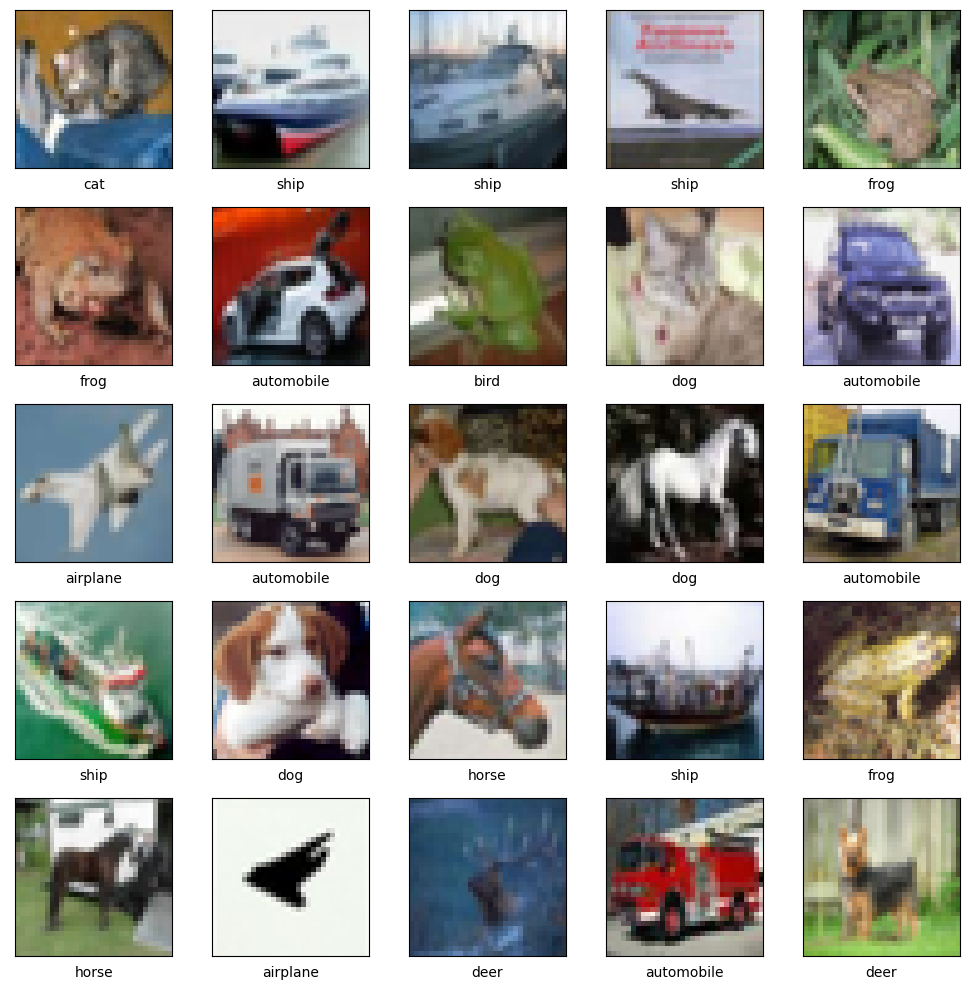

In [24]:
# Make predictions on the test set
logits = cnn_model.predict(X_test)
predictions = logits.argmax(axis = 1)


## Plot individual predictions
show_cifar10_images(X_test, predictions, class_names, 25)

**Actual Labels:**

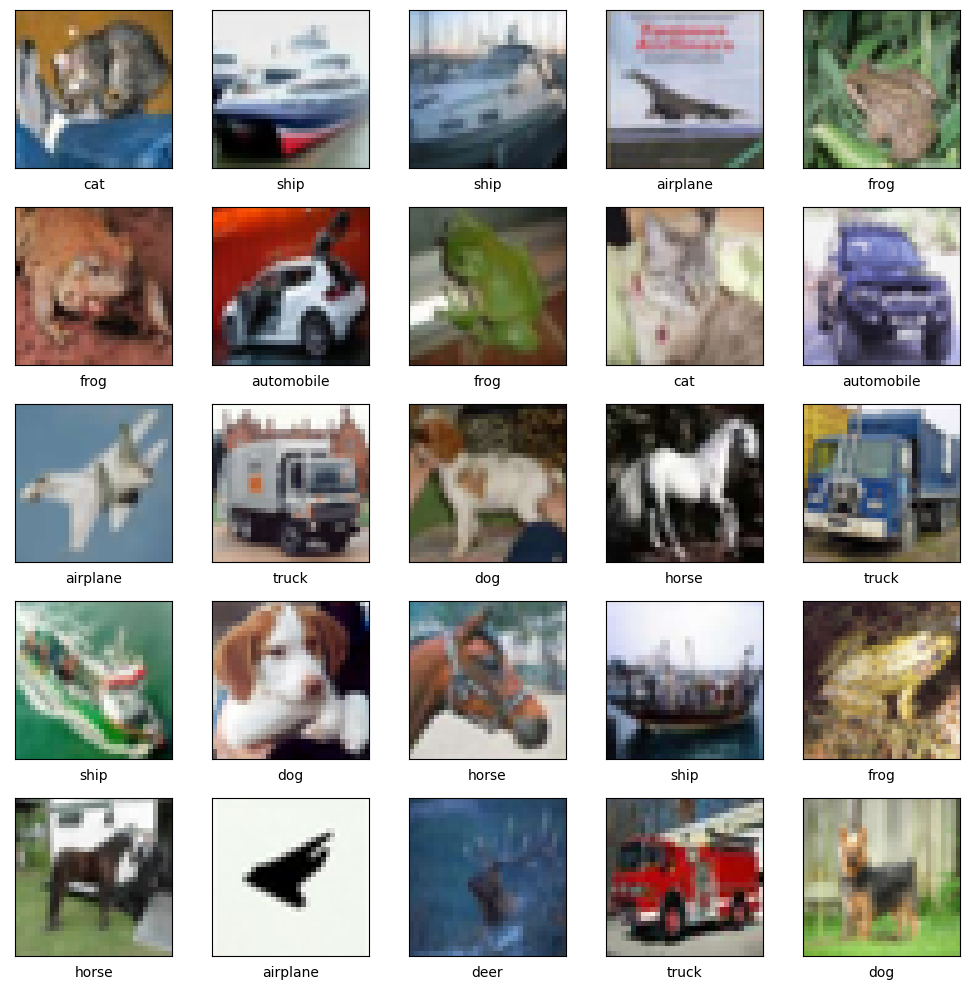

In [25]:
show_cifar10_images(X_test, y_test, class_names, 25)

### Grid Search

In [12]:
def create_cnn_model(learning_rate):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(32, 32, 3)))

    model.add(keras.layers.Conv2D(filters=16, kernel_size=3))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Conv2D(filters=32, kernel_size=3))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Conv2D(filters=64, kernel_size=3))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Conv2D(filters=128, kernel_size=3))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.GlobalAveragePooling2D())

    model.add(keras.layers.Dense(units=10, activation='softmax'))

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
    return model

In [13]:
model = KerasClassifier(build_fn=create_cnn_model, verbose=1)

In [14]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'epochs': [5],
    'batch_size': [32, 64]
}

In [15]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


2025-07-27 22:11:08.007793: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-07-27 22:11:08.007820: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2025-07-27 22:11:08.007837: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-0ce12ede697464f1d): /proc/driver/nvidia/version does not exist
2025-07-27 22:11:08.008007: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-27 22:11:08.364578: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the

Epoch 1/5
1042/1042 [==============================] - 54s 52ms/step - loss: 1.5645 - accuracy: 0.4233
Epoch 2/5
1042/1042 [==============================] - 54s 51ms/step - loss: 1.2924 - accuracy: 0.5386
Epoch 3/5
1042/1042 [==============================] - 54s 52ms/step - loss: 1.1637 - accuracy: 0.5874
Epoch 4/5
1042/1042 [==============================] - 54s 52ms/step - loss: 1.0854 - accuracy: 0.6150
Epoch 5/5
521/521 [==============================] - 7s 14ms/step - loss: 1.3310 - accuracy: 0.5254
[CV] END .........batch_size=32, epochs=5, learning_rate=0.1; total time= 5.5min
Epoch 1/5
1042/1042 [==============================] - 54s 52ms/step - loss: 1.5640 - accuracy: 0.4241
Epoch 2/5
1042/1042 [==============================] - 54s 51ms/step - loss: 1.2762 - accuracy: 0.5427
Epoch 3/5
1042/1042 [==============================] - 53s 51ms/step - loss: 1.1508 - accuracy: 0.5886
Epoch 4/5
1042/1042 [==============================] - 53s 51ms/step - loss: 1.0702 - accuracy: 0.

Using 5 epochs for now, will switch to 30 for final model.

In [18]:
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best parameters: {'batch_size': 64, 'epochs': 5, 'learning_rate': 0.1}
Best CV score: 0.4879196385542552


### Final Model Construction

#### First Round:

In [19]:
# 1. Create CNN model object
best_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
input_layer = keras.layers.InputLayer(input_shape=X_train[0].shape)
best_model.add(input_layer)

# 3. Create the first convolutional layer and add it to the model object:
conv_1 = keras.layers.Conv2D(filters=16, kernel_size=3)
batchNorm_1 = keras.layers.BatchNormalization()
ReLU_1 = keras.layers.ReLU()
best_model.add(conv_1)
best_model.add(batchNorm_1)
best_model.add(ReLU_1)

# 4. Create the second convolutional layer and add it to the model object:
conv_2 = keras.layers.Conv2D(filters=32, kernel_size=3)
batchNorm_2 = keras.layers.BatchNormalization()
ReLU_2 = keras.layers.ReLU()
best_model.add(conv_2)
best_model.add(batchNorm_2)
best_model.add(ReLU_2)

# 5. Create the third convolutional layer and add it to the model object:
conv_3 = keras.layers.Conv2D(filters=64, kernel_size=3)
batchNorm_3 = keras.layers.BatchNormalization()
ReLU_3 = keras.layers.ReLU()
best_model.add(conv_3)
best_model.add(batchNorm_3)
best_model.add(ReLU_3)

# 6. Create the fourth convolutional layer and add it to the model object:
conv_4 = keras.layers.Conv2D(filters=128, kernel_size=3)
batchNorm_4 = keras.layers.BatchNormalization()
ReLU_4 = keras.layers.ReLU()
best_model.add(conv_4)
best_model.add(batchNorm_4)
best_model.add(ReLU_4)

# 7. Create the pooling layer and add it to the model object:
pooling_layer = keras.layers.GlobalAveragePooling2D()
best_model.add(pooling_layer)

# 8. Create the output layer and add it to the model object:
output_layer = keras.layers.Dense(units=10, activation='softmax')
best_model.add(output_layer)

best_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_76 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
re_lu_76 (ReLU)              (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_77 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu_77 (ReLU)              (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 26, 26, 64)      

In [20]:
best_optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
best_model.compile(optimizer=best_optimizer, loss=loss_fn, metrics=['accuracy'])

In [21]:
num_epochs = 30

t0 = time.time() 

history = best_model.fit(X_train, y_train, epochs=num_epochs, batch_size=64)

t1 = time.time() 

print('Elapsed time: %.2fs' % (t1-t0))

Epoch 1/30
782/782 [==============================] - 80s 102ms/step - loss: 1.4939 - accuracy: 0.4549
Epoch 2/30
782/782 [==============================] - 79s 102ms/step - loss: 1.2166 - accuracy: 0.5668
Epoch 3/30
782/782 [==============================] - 79s 101ms/step - loss: 1.0935 - accuracy: 0.6135
Epoch 4/30
782/782 [==============================] - 80s 102ms/step - loss: 1.0141 - accuracy: 0.6425
Epoch 5/30
782/782 [==============================] - 80s 102ms/step - loss: 0.9538 - accuracy: 0.6663
Epoch 6/30
782/782 [==============================] - 80s 102ms/step - loss: 0.9068 - accuracy: 0.6826
Epoch 7/30
782/782 [==============================] - 79s 101ms/step - loss: 0.8677 - accuracy: 0.6950
Epoch 8/30
782/782 [==============================] - 79s 101ms/step - loss: 0.8360 - accuracy: 0.7064
Epoch 9/30
782/782 [==============================] - 79s 102ms/step - loss: 0.8085 - accuracy: 0.7167
Epoch 10/30
782/782 [==============================] - 79s 101ms/step - l

In [22]:
loss, accuracy = best_model.evaluate(X_test, y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

313/313 [==============================] - 5s 14ms/step - loss: 1.0418 - accuracy: 0.6675
Loss:  1.0417907238006592 Accuracy:  0.6675000190734863


We have a case of overfitting here, so we need to add some dropout layers and pooling, in addition to that data augmentation.

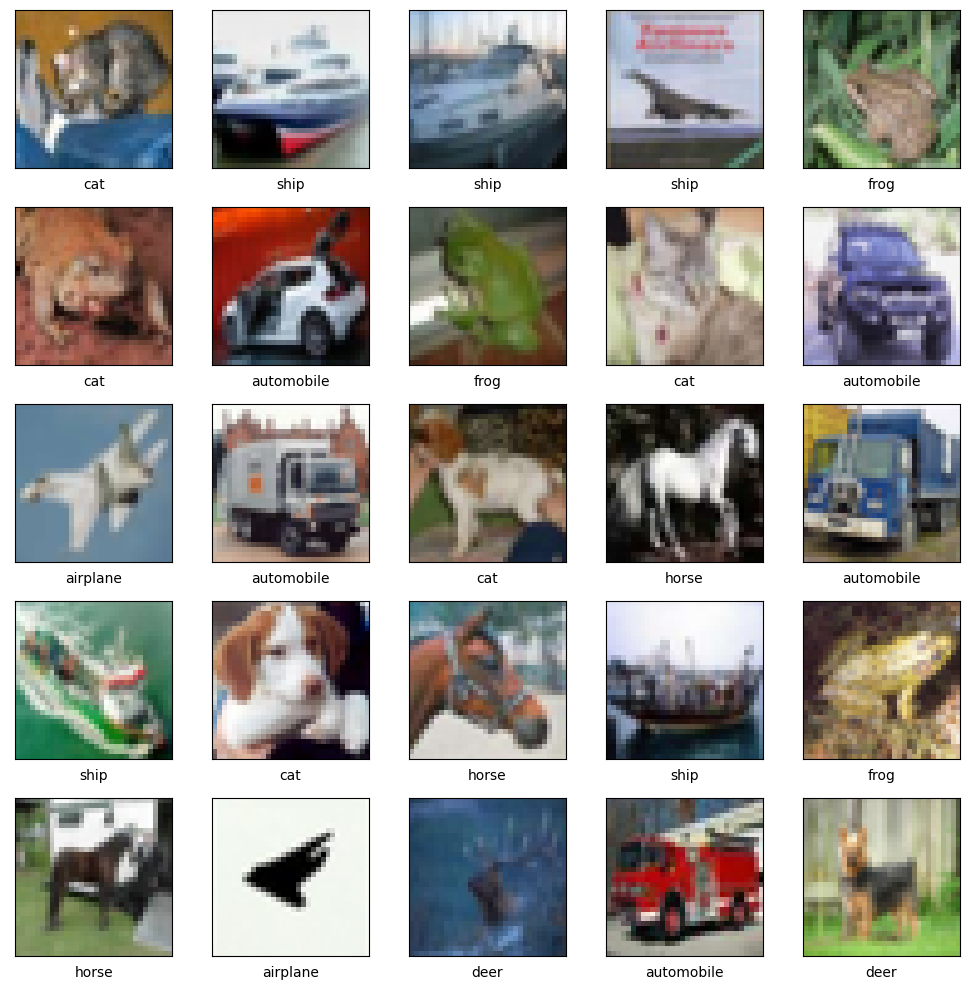

In [23]:
# Make predictions on the test set
logits = best_model.predict(X_test)
predictions = logits.argmax(axis = 1)


## Plot individual predictions
show_cifar10_images(X_test, predictions, class_names, 25)

#### Second Round:

In [69]:
# 1. Create CNN model object
best_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
input_layer = keras.layers.InputLayer(input_shape=X_train[0].shape)
best_model.add(input_layer)

# 3. Create the first convolutional layer and add it to the model object:
conv_1 = keras.layers.Conv2D(filters=16, kernel_size=3, padding='same')
batchNorm_1 = keras.layers.BatchNormalization()
ReLU_1 = keras.layers.ReLU()
best_model.add(conv_1)
best_model.add(batchNorm_1)
best_model.add(ReLU_1)
best_model.add(keras.layers.MaxPooling2D(pool_size=2)) # add pooling here
best_model.add(keras.layers.Dropout(0.2)) # add dropout here

# 4. Create the second convolutional layer and add it to the model object:
conv_2 = keras.layers.Conv2D(filters=32, kernel_size=3, padding='same')
batchNorm_2 = keras.layers.BatchNormalization()
ReLU_2 = keras.layers.ReLU()
best_model.add(conv_2)
best_model.add(batchNorm_2)
best_model.add(ReLU_2)
best_model.add(keras.layers.MaxPooling2D(pool_size=2)) # add pooling here
best_model.add(keras.layers.Dropout(0.2)) # add dropout here

# 5. Create the third convolutional layer and add it to the model object:
conv_3 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same')
batchNorm_3 = keras.layers.BatchNormalization()
ReLU_3 = keras.layers.ReLU()
best_model.add(conv_3)
best_model.add(batchNorm_3)
best_model.add(ReLU_3)
best_model.add(keras.layers.MaxPooling2D(pool_size=2)) # add pooling here
best_model.add(keras.layers.Dropout(0.2)) # add dropout here

# 6. Create the fourth convolutional layer and add it to the model object:
conv_4 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same')
batchNorm_4 = keras.layers.BatchNormalization()
ReLU_4 = keras.layers.ReLU()
best_model.add(conv_4)
best_model.add(batchNorm_4)
best_model.add(ReLU_4)
best_model.add(keras.layers.MaxPooling2D(pool_size=2)) # add pooling here
best_model.add(keras.layers.Dropout(0.2)) # add dropout here

# 7. Create the pooling layer and add it to the model object:
pooling_layer = keras.layers.GlobalAveragePooling2D()
best_model.add(pooling_layer)

# 8. Create the output layer and add it to the model object:
output_layer = keras.layers.Dense(units=10, activation='softmax')
best_model.add(output_layer)

best_model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_120 (Bat (None, 32, 32, 16)        64        
_________________________________________________________________
re_lu_120 (ReLU)             (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_121 (Bat (None, 16, 16, 32)      

In [70]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
best_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
# Trying out adam optimizer to see difference

In [71]:
num_epochs = 100

t0 = time.time() 

history = best_model.fit(X_train, y_train, epochs=num_epochs, batch_size=64)

t1 = time.time() 

print('Elapsed time: %.2fs' % (t1-t0))

Epoch 1/100
782/782 [==============================] - 16s 20ms/step - loss: 1.5152 - accuracy: 0.4504
Epoch 2/100
782/782 [==============================] - 15s 20ms/step - loss: 1.1977 - accuracy: 0.5749
Epoch 3/100
782/782 [==============================] - 15s 19ms/step - loss: 1.0814 - accuracy: 0.6161
Epoch 4/100
782/782 [==============================] - 15s 20ms/step - loss: 1.0037 - accuracy: 0.6446
Epoch 5/100
782/782 [==============================] - 15s 19ms/step - loss: 0.9484 - accuracy: 0.6655
Epoch 6/100
782/782 [==============================] - 15s 20ms/step - loss: 0.9119 - accuracy: 0.6756
Epoch 7/100
782/782 [==============================] - 15s 19ms/step - loss: 0.8739 - accuracy: 0.6906
Epoch 8/100
782/782 [==============================] - 15s 20ms/step - loss: 0.8464 - accuracy: 0.6999
Epoch 9/100
782/782 [==============================] - 15s 20ms/step - loss: 0.8233 - accuracy: 0.7113
Epoch 10/100
782/782 [==============================] - 15s 19ms/step - l

### Final Model Validation

In [72]:
loss, accuracy = best_model.evaluate(X_test, y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

313/313 [==============================] - 2s 3ms/step - loss: 0.5650 - accuracy: 0.8046
Loss:  0.5649964213371277 Accuracy:  0.8046000003814697


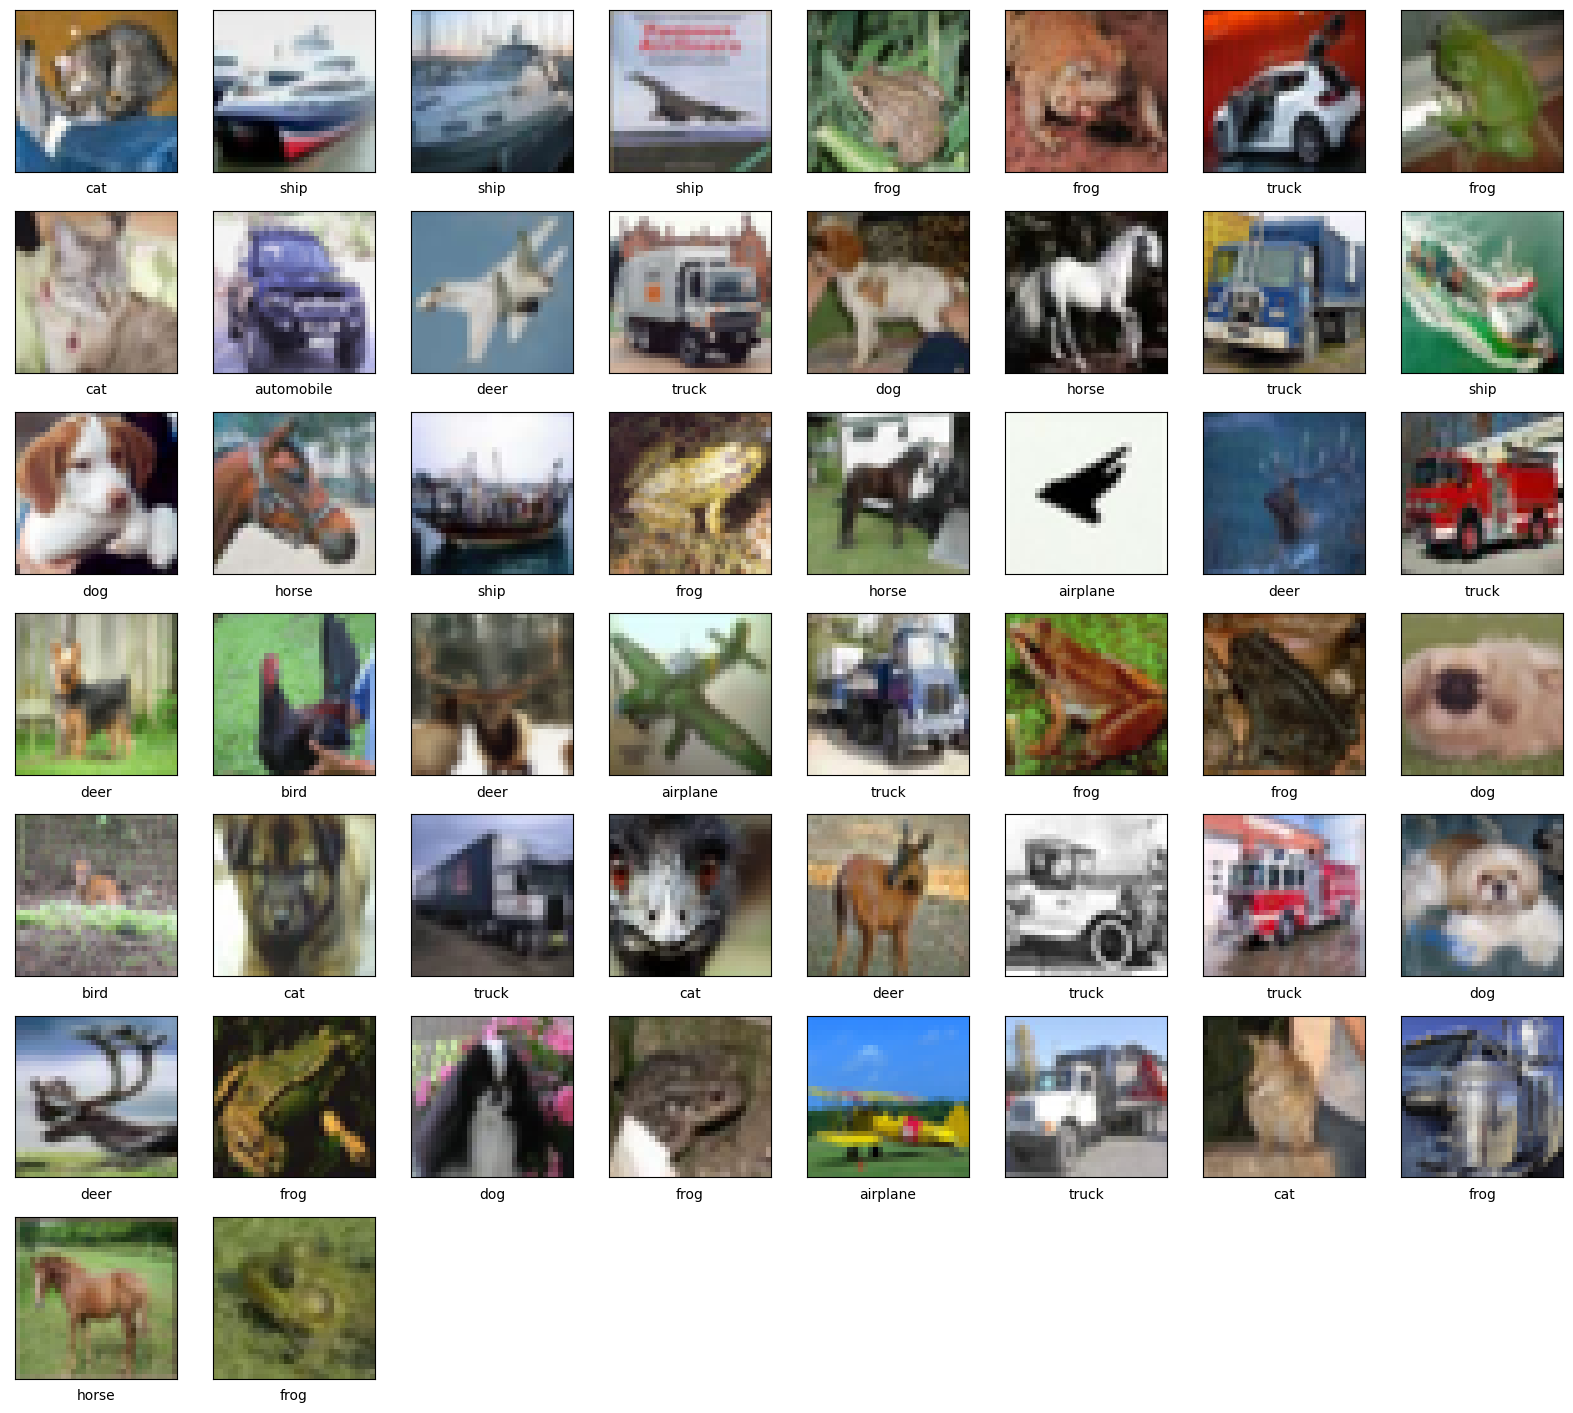

In [75]:
# Make predictions on the test set
logits = best_model.predict(X_test)
predictions = logits.argmax(axis = 1)


## Plot individual predictions
show_cifar10_images(X_test, predictions, class_names, 50)

**Actual Labels:**

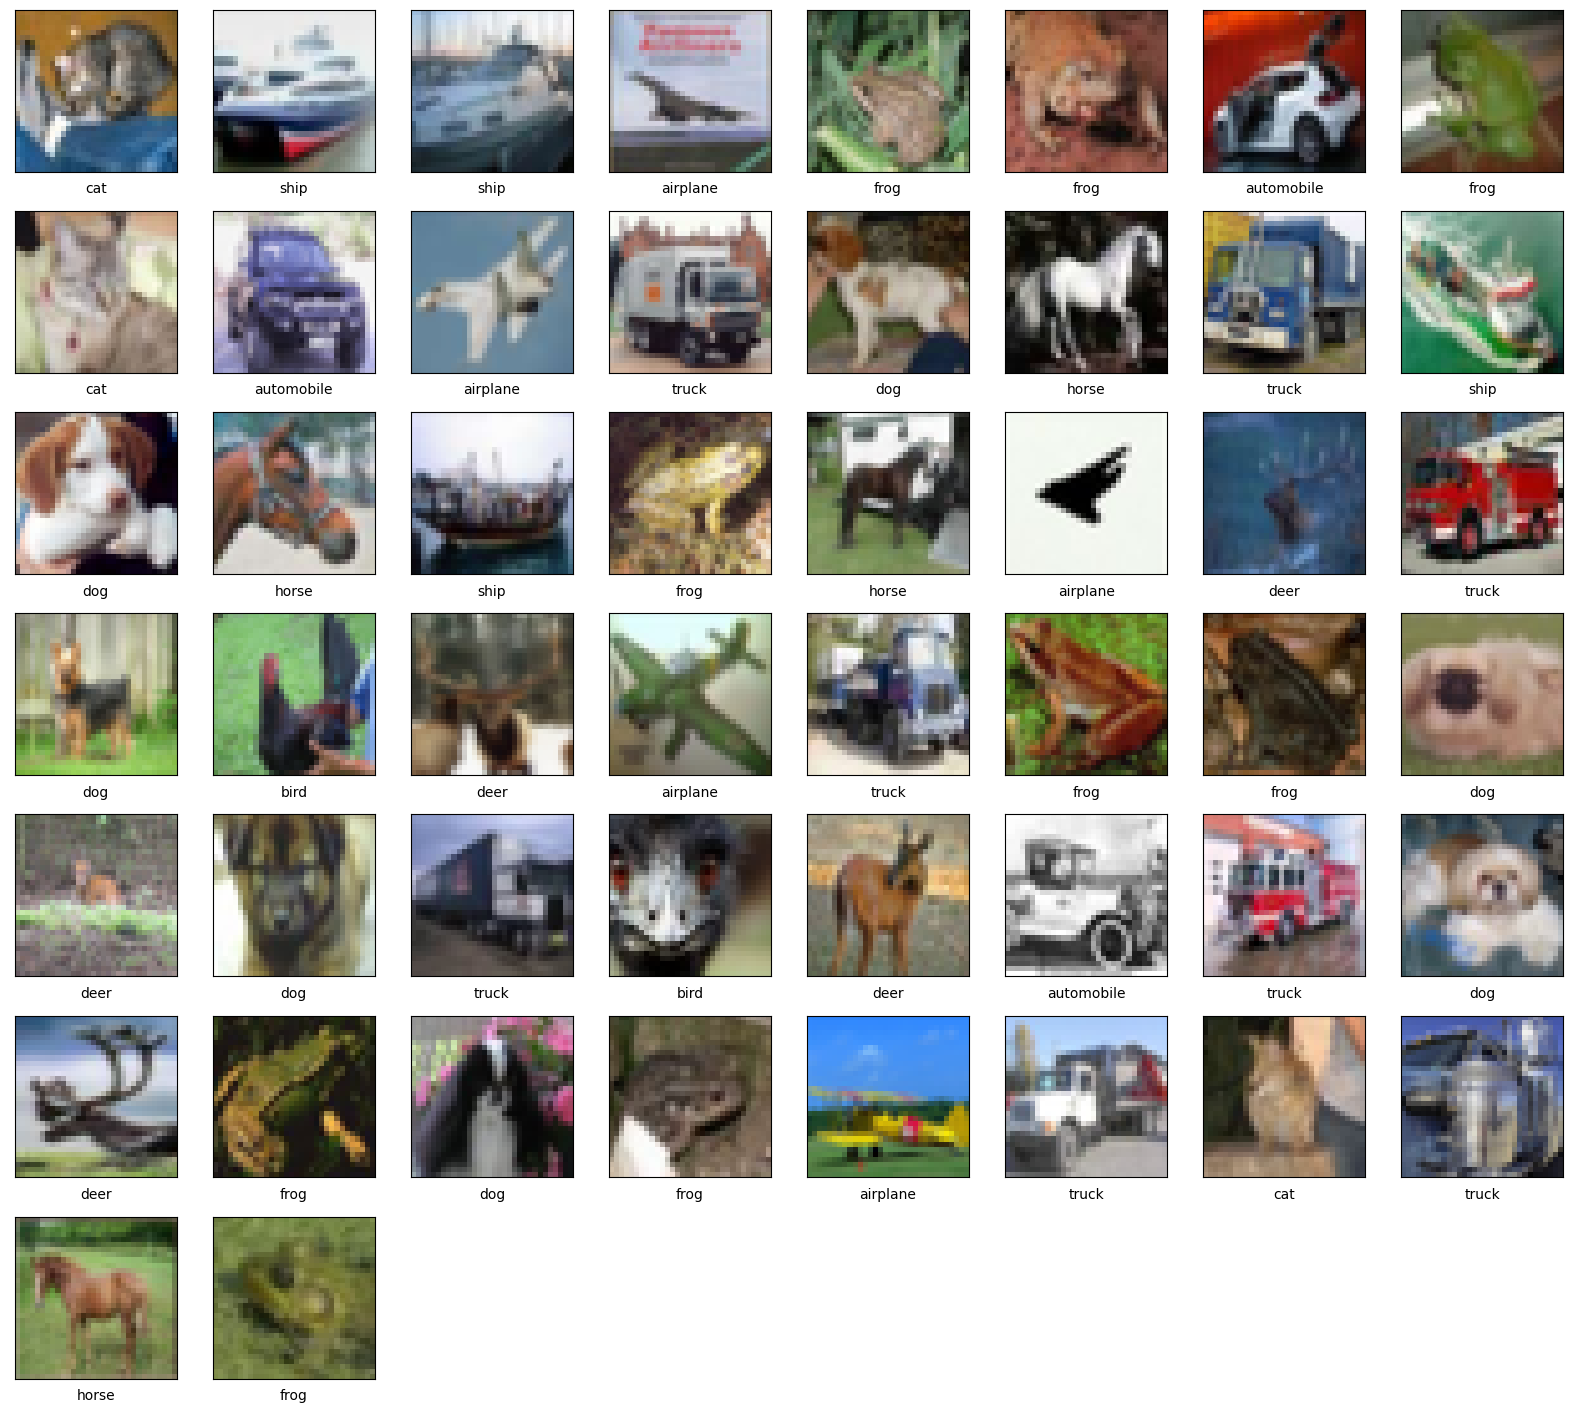

In [78]:
show_cifar10_images(X_test, y_test, class_names, 50)

### Model Deployment

In [82]:
model_filename = "Image_Classification_Model.keras"  

In [84]:
best_model.save(model_filename)

In [86]:
test_model = keras.models.load_model(model_filename)

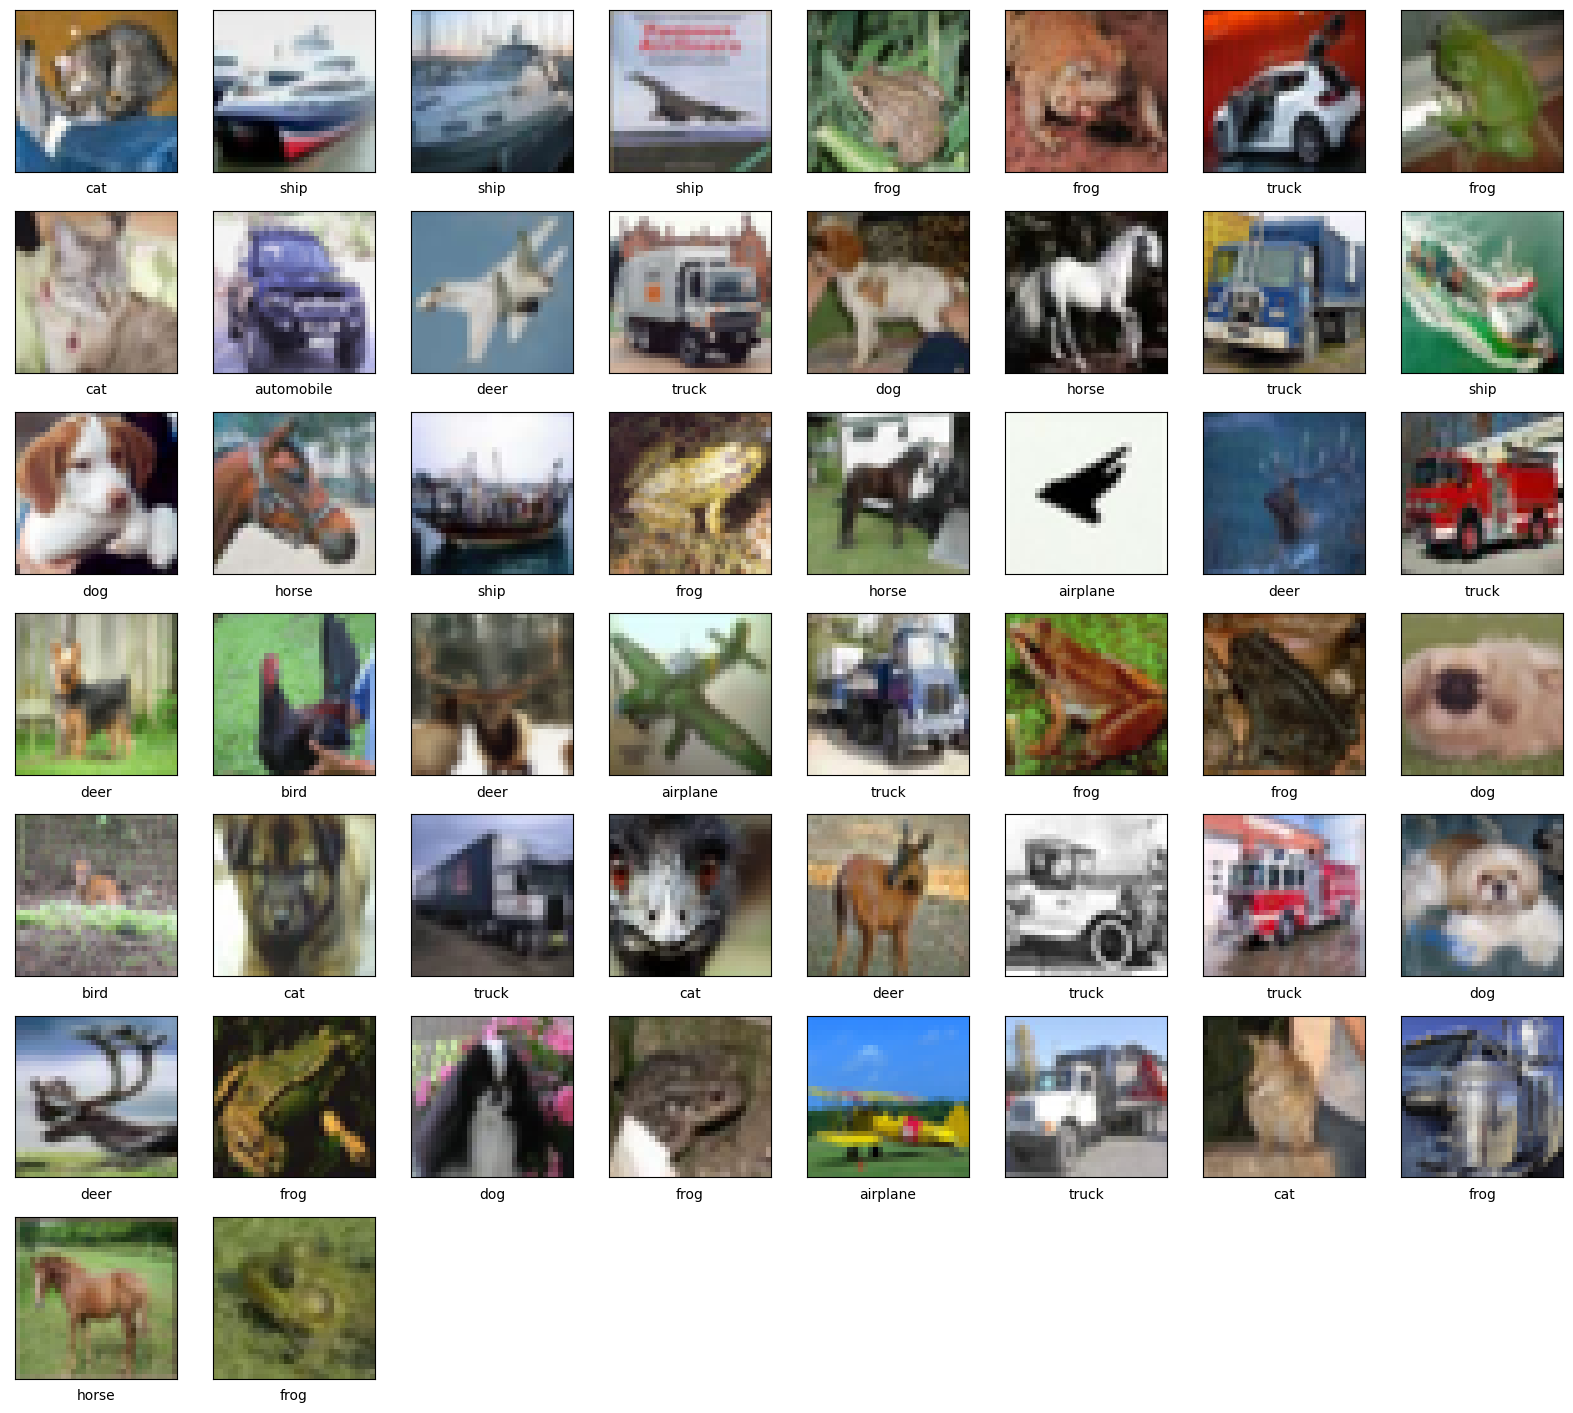

In [87]:
# Make predictions on the test set
logits = test_model.predict(X_test)
predictions = logits.argmax(axis = 1)


## Plot individual predictions
show_cifar10_images(X_test, predictions, class_names, 50)